<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [4]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [6]:
image = np.array(Image.open('./Images/lemon.jpeg'))

Shape of the Image:  (100, 100, 3)


## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of the Image:  (100, 100, 3)
Shape of the single channel image: (100, 100)


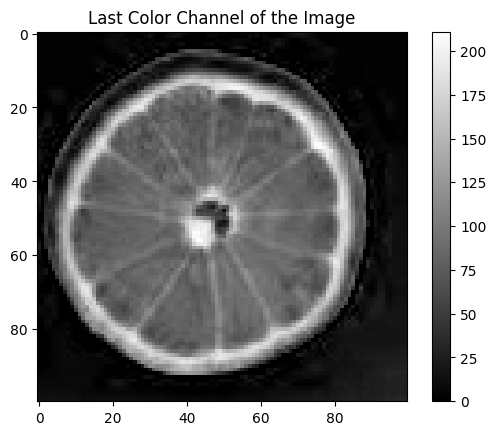

In [7]:
# 1: Print the shape of the image
print("Shape of the Image: ", image.shape)  

# 2: New variable called img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:, :, -1] # -1 is for blue channel


# 3: Printing the shape of img_single_channel
print("Shape of the single channel image:", img_single_channel.shape)

# 4: Plotting img_single_channel
plt.imshow(img_single_channel, cmap='gray')
plt.colorbar()
plt.title('Last Color Channel of the Image')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of the averaged channel image: (100, 100)


(-0.5, 99.5, 99.5, -0.5)

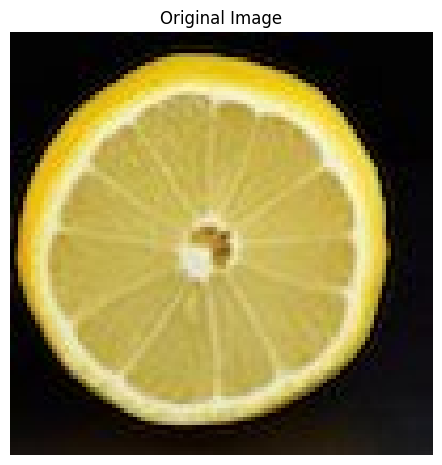

In [8]:
# 1: New variable called img_average_channel
img_average_channel = np.mean(image, axis=2)

# 2: Printing the shape of img_average_channel
print("Shape of the averaged channel image:", img_average_channel.shape)

# 3: Plotting the original image
# If you need colors to show information or make it look nice, you'll like the original picture. 
# But if you want to study the picture's shapes, patterns, or certain parts closely, you might like the grayscale version
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [9]:
# 1: Describe what an identity matrix is. What does multiplying with an identity matrix do?
# An identity matrix is a square matrix in which all the elements of principal diagonals are one, and all other elements are zeros. 
# It is denoted by the notation “In” or simply “I”. If any matrix is multiplied with the identity matrix, the result will be given matrix
# Ref: https://byjus.com/maths/identity-matrix/#:~:text=An%20identity%20matrix%20is%20a,result%20will%20be%20given%20matrix.

# 2: Creating an identity_matrix that has the same size as img_average_channel
no_of_rows, no_of_cols = img_average_channel.shape
identity_matrix = np.eye(no_of_rows, no_of_cols)

#3: Random row out of identity_matrix
random_row_index = np.random.randint(no_of_rows)
print("Random row from identity_matrix:", identity_matrix[random_row_index])


Random row from identity_matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [10]:
# 1: Creating a Numpy array that contains the numbers 0,1,...,N.
N = img_average_channel.shape[0]
indices = np.arange(N)

# 2: Use numpy.random.shuffle to shuffle the indices
np.random.shuffle(indices)
rows = indices

# 3: Printing rows and inspecting the elements
print("Shuffled row indices:", rows)

Shuffled row indices: [50 34 46 84 15 13 63 19 35 71 78 40 85 29  8 38 20 98 31 58 54 49  0  3
 79  1 24 23 65 97 59 86 96 28 69  9 25 87 64 53 92 22 41 26 99 83 11 74
 80 91 14 10  7 70 95 45 43 33  2 56 47 30 81 12 62 42 67 75  6 66 52 73
 72 17 51 61 89 27 77 94 18 90  5 82 68 39 60 48 93  4 36 21 37 76 88 55
 44 16 57 32]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [11]:
# 1: A New matrix T from identity_matrix
T = identity_matrix[rows]

# 2: Describe in your own words what matrix T is?
# T is the new matrix created by rearranging the rows of the identity_matrix according to the order specified in the rows variable.

# 3: Printing shape of T
print("Shape of T:", T.shape)

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of Transformed Image: (100, 100)


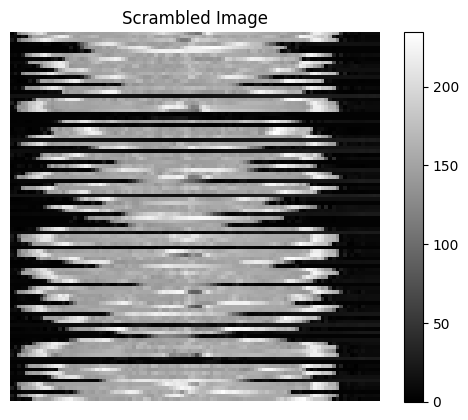

In [12]:
# 1: Matrix multiply T and img_average_channel
transformed_image = T @ img_average_channel
print("Shape of Transformed Image:", transformed_image.shape)

# 2: Plot transformed_image
# The pattern seen here is a distorted version of the greyscale image
plt.imshow(transformed_image, cmap='gray')
plt.title('Scrambled Image')
plt.colorbar()
plt.axis('off')
plt.show()

# 3: Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.
# Because of the dot product between T and the img_average_channel, each row of T determines 
# how much influence each element in the im_average_channel has on the corresponding row in the Transformed image.
# The dot product combines different parts of the img_average_channel according to the rows of T, resulting in a reorganized/emphasized certain features

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

-1.0
Matrix T is invertible


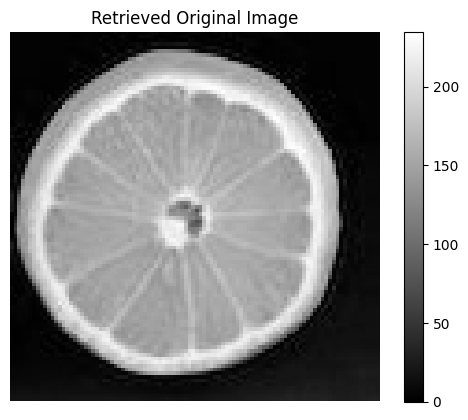

In [14]:
# 1: Inverse of T
T_inv = np.linalg.inv(T)

# To determine if a matrix T is invertible, we need to check if its determinant is non-zero. A matrix is invertible if and only if its determinant is not zero.
det_T = np.linalg.det(T)
print(det_T)

if det_T != 0:
    print("Matrix T is invertible")
else:
    print("Matrix T is not invertible")

# 2: Inverse of the scrambling operation
retrieved_image = T_inv @ transformed_image

# 3: Plot the result
plt.imshow(retrieved_image, cmap='gray')
plt.title('Retrieved Original Image')
plt.colorbar()
plt.axis('off')
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

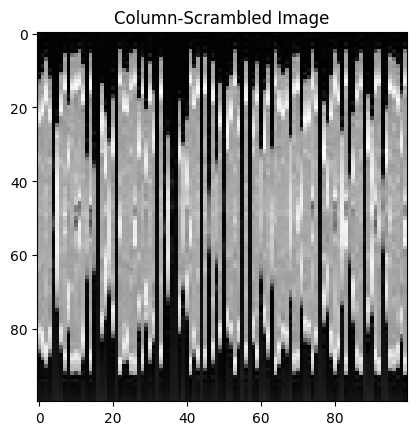

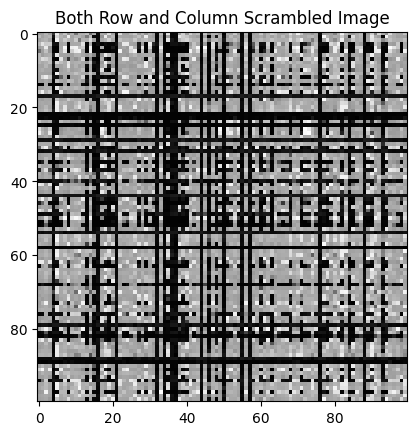

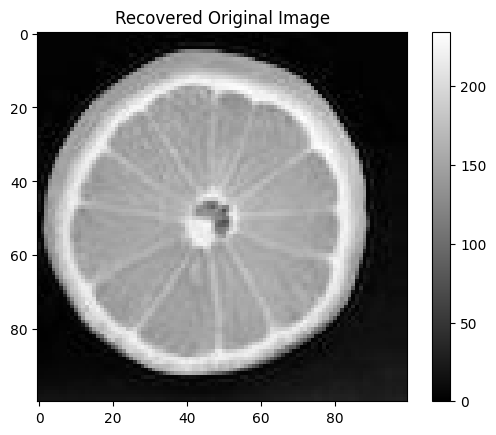

In [15]:
# 1: We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.
# To get a scrambled column image, we'll want to pre-multiply the image with the transformation matrix.

# Scrambling the columns of the original image using T
transformed_image_columns = img_average_channel @ T

# Plotting the column-scrambled image
plt.imshow(transformed_image_columns, cmap='gray')
plt.title("Column-Scrambled Image")
plt.show()

# 2: Retreiving the original image by performing scrambling on both the columns and rows of the original image

# Scrambling both the columns and rows of the original image using T
transformed_image_both = T @ img_average_channel @ T

# Plotting the both row and column scrambled image
plt.imshow(transformed_image_both, cmap='gray')
plt.title("Both Row and Column Scrambled Image")
plt.show()

# Using T_inv to retrieve the original image from the both row and column scrambled image
retrieved_image_both = T_inv @ transformed_image_both @ T_inv

# Plotting the retrieved image
plt.imshow(retrieved_image_both, cmap='gray')
plt.colorbar()
plt.title("Recovered Original Image")
plt.show()